In [ ]:
from google.colab import drive
drive.mount('/content/drive') #구글 드라이브 마운트

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!pip install tensorflow==2.8.0
!pip install tensorflow-io==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 54.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [ ]:
#librosa library 설치
#!pip install librosa

import os #os 모듈 -> Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 함

import librosa #음악 및 오디오 신호 처리를 위한 파이썬 라이브러리
import librosa.display #waveform을 시각화
import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

import math
from IPython.display import Audio
from string import ascii_uppercase
from pandas import DataFrame
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.io.wavfile import write

NOT_SNORING_DATA_PATH = '/content/drive/MyDrive/Snoring/0/0_0.wav'
SNORING_DATA_PATH = '/content/drive/MyDrive/Snoring/1/1_0.wav'

In [ ]:
#Snoring
ipd.Audio(SNORING_DATA_PATH)

In [ ]:
#Non_Snoring
ipd.Audio(NOT_SNORING_DATA_PATH)

In [ ]:
#지정한 디렉토리 내의 모든 파일과 디렉토리의 리스트를 리턴
os.listdir('/content/drive/MyDrive/Snoring')

['Snoring_dataset.txt', '0', '1']

In [ ]:
#Librosa MFCC로 음성 데이터 특징 추출 및 음성 인식 CNN 딥러닝 모델

#데이터 경로(PATH)
NOT_SNORING_DATA_PATH = '/content/drive/MyDrive/Snoring/0'
SNORING_DATA_PATH = '/content/drive/MyDrive/Snoring/1'

In [ ]:
SNORING_DATA_PATH

'/content/drive/MyDrive/Snoring/1'

In [ ]:
#데이터 파일 경로(FILE)
#os.path.join => 2개의 문자열을 합쳐 하나의 경로로 만드는 함수
SNORING_FILE = os.path.join(SNORING_DATA_PATH,'1_0.wav')
NOT_SNORING_FILE = os.path.join(NOT_SNORING_DATA_PATH,'0_0.wav')

In [ ]:
#데이터 로드 함수
def data_load(filename):
    # Load encoded wav file => 파일을 읽어옴
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) => 오디오 파일을 디코딩
    # tf.audio.decode_wav 가 반환하는 텐서의 모양 samples, channels(default : -1)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    #waveform - 파형 / Sampling rate => 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다
    #사람 목소리 대부분이 16000헤르츠 안에 포함되기 때문
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)

    return wav

In [ ]:
#!pip uninstall tensorflow_io -y
!pip install tensorflow_io==0.23.1

Found existing installation: tensorflow-io 0.37.0
Uninstalling tensorflow-io-0.37.0:
  Successfully uninstalled tensorflow-io-0.37.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.37.0
    Uninstalling tensorflow-io-gcs-filesystem-0.37.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.37.0


In [ ]:
wave = data_load(SNORING_FILE) #오류 발생 -> tensorflow지웠다가 다시 깔음
nwave = data_load(NOT_SNORING_FILE)

NameError: name 'SNORING_FILE' is not defined

In [ ]:
#Tensor - 데이터의 배열
#tf.data.Dataset은 기본적으로 파이썬의 반복 가능 객체, 즉 iterator로 꺼낼 쓸 수 있음
pos = tf.data.Dataset.list_files(SNORING_DATA_PATH+'/*.wav')
neg = tf.data.Dataset.list_files(NOT_SNORING_DATA_PATH+'/*.wav')

#tf.data.Dataset.from tensor slices() : 주어진 데이터 소스를 여러 Tensor로 짜른다 -> numpy array x(input)을 Dataset으로 변환
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos))))) #튜플 형태(pos, 1) / (neg, 1)
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives) # pos, neg 두 개를 연결

os.listdir(os.path.join(SNORING_DATA_PATH))
os.listdir(os.path.join(NOT_SNORING_DATA_PATH))

['0_0.wav',
 '0_101.wav',
 '0_10.wav',
 '0_100.wav',
 '0_1.wav',
 '0_116.wav',
 '0_121.wav',
 '0_102.wav',
 '0_130.wav',
 '0_15.wav',
 '0_149.wav',
 '0_14.wav',
 '0_139.wav',
 '0_122.wav',
 '0_132.wav',
 '0_111.wav',
 '0_131.wav',
 '0_150.wav',
 '0_123.wav',
 '0_103.wav',
 '0_137.wav',
 '0_126.wav',
 '0_151.wav',
 '0_146.wav',
 '0_12.wav',
 '0_152.wav',
 '0_147.wav',
 '0_128.wav',
 '0_143.wav',
 '0_125.wav',
 '0_156.wav',
 '0_107.wav',
 '0_138.wav',
 '0_118.wav',
 '0_106.wav',
 '0_148.wav',
 '0_120.wav',
 '0_144.wav',
 '0_115.wav',
 '0_13.wav',
 '0_155.wav',
 '0_136.wav',
 '0_140.wav',
 '0_108.wav',
 '0_141.wav',
 '0_142.wav',
 '0_109.wav',
 '0_105.wav',
 '0_110.wav',
 '0_113.wav',
 '0_129.wav',
 '0_153.wav',
 '0_114.wav',
 '0_112.wav',
 '0_104.wav',
 '0_145.wav',
 '0_124.wav',
 '0_134.wav',
 '0_117.wav',
 '0_135.wav',
 '0_154.wav',
 '0_127.wav',
 '0_133.wav',
 '0_11.wav',
 '0_119.wav',
 '0_221.wav',
 '0_297.wav',
 '0_282.wav',
 '0_243.wav',
 '0_201.wav',
 '0_248.wav',
 '0_237.wav',
 '

In [ ]:
#예시
lengths = []
for file in os.listdir(os.path.join(NOT_SNORING_DATA_PATH)):
    #음성 데이터 load
    #waveform - 파형 / Sampling rate => 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다
    #오디오 파일 로드
    y, sr = librosa.load(SNORING_DATA_PATH+'/1_0.wav', sr=16000) #코골이 소리인 데이터 로드
    lengths.append(len(y))

lengths

[16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,


In [ ]:
#전처리 함수
def preprocess(file_path, label):
    wav = data_load(file_path)
    wav = wav[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    #푸리에 변환: 시간 영역 데이터를 주파수 영역으로 변경
    #FFT(Fast Fourier Transform) - time-domain -> frequency-domain 으로 바꿔줌(주파수 분석)
    #STFT(Short-Time Fourier Transform)
    #-시간 정보가 유실되는 것을 방지하기 위해, 사전에 정의한 시간의 간격(window 또는 frame) 단위로 쪼개어 푸리에 변환을 적용하는 기법
    #win_length: FFT를 할 때 참조할 그래프의 길이
    #hop_length: 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터 즉, 칼라맵의 시간 주기
    #n_fft: win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터
    #Spectogram: 시간에 따른 신호 주파수의 스펙트럼 그래프
    #spectogram = np.abs(librosa.stft(wav, n_fft=2048, hop_length=512))
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    return spectrogram, label


In [ ]:
data.as_numpy_iterator().next() #(file_path, label)

(b'/content/drive/MyDrive/Snoring/1/1_44.wav', 1.0)

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(64)
data = data.prefetch(8)

In [ ]:
len(data)

16

In [ ]:
import math
train = data.take(math.ceil(len(data)*.7))
test = data.skip(math.ceil(len(data)*.7)).take(math.floor(len(data)*.3))

In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape

(64, 491, 257, 1)

In [ ]:
input_shape = samples.shape[1:]
input_shape

(491, 257, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D,Dropout,GlobalAveragePooling2D,Activation
from tensorflow.keras import layers

#모델 생성
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 489, 255, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 487, 253, 16)      2320      
                                                                 
 flatten (Flatten)           (None, 1971376)           0         
                                                                 
 dense (Dense)               (None, 128)               252336256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 252,338,865
Trainable params: 252,338,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 학습
hist = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
12/12 [==============================] - 198s 16s/step - loss: 7.9396 - recall: 0.7487 - precision: 0.6562 - val_loss: 1.3274 - val_recall: 0.6116 - val_precision: 0.9367
Epoch 2/10
12/12 [==============================] - 199s 17s/step - loss: 1.0320 - recall: 0.7273 - precision: 0.8193 - val_loss: 0.1522 - val_recall: 0.9322 - val_precision: 0.9167
Epoch 3/10
12/12 [==============================] - 198s 17s/step - loss: 0.2226 - recall: 0.9258 - precision: 0.9188 - val_loss: 0.1344 - val_recall: 0.9483 - val_precision: 0.9910
Epoch 4/10
12/12 [==============================] - 193s 16s/step - loss: 0.0948 - recall: 0.9823 - precision: 0.9798 - val_loss: 0.0581 - val_recall: 0.9832 - val_precision: 0.9915
Epoch 5/10
12/12 [==============================] - 203s 17s/step - loss: 0.0333 - recall: 0.9975 - precision: 0.9949 - val_loss: 0.0237 - val_recall: 0.9919 - val_precision: 0.9919
Epoch 6/10
12/12 [==============================] - 198s 17s/step - loss: 0.0164 - recall:

In [ ]:
loss = 'loss'
val_loss = 'val_loss'
recall = 'recall'
val_recall = 'val_recall'
precision = 'precision'
val_precision = 'val_precision'

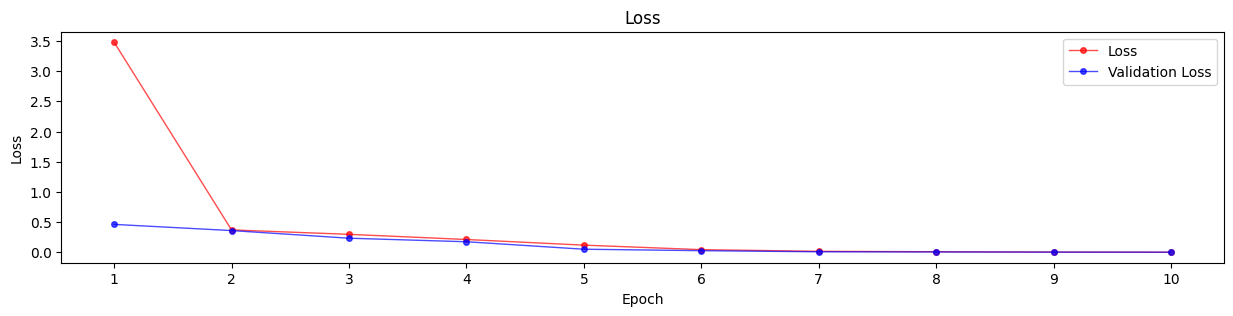

In [ ]:
x_values = np.arange(1,11,1)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,4)

plt.title('Loss')
plt.plot(x_values,hist.history[loss], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Loss',markersize=4)
plt.plot(x_values,hist.history[val_loss], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Loss',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[loss]
z = hist.history[loss]
val_z = hist.history[val_loss]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Loss = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-5, 25), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Loss = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-5, 15), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()

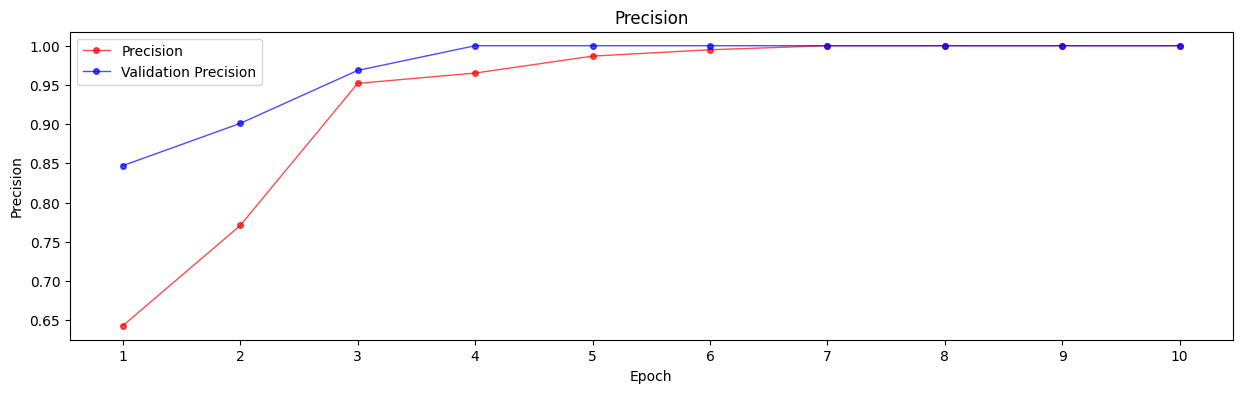

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,3)

plt.title('Precision')
plt.plot(x_values,hist.history[precision], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Precision',markersize=4)
plt.plot(x_values,hist.history[val_precision], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Precision',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[precision]
z = hist.history[precision]
val_z = hist.history[val_precision]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Prec. = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Prec. = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()

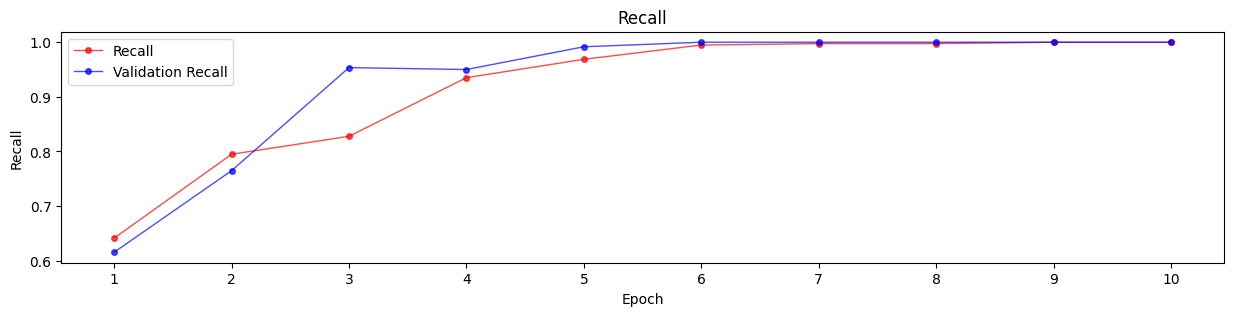

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,4)

plt.title('Recall')
ax.plot(x_values,hist.history[recall], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Recall',markersize=4)
ax.plot(x_values,hist.history[val_recall], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Recall',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[recall]
z = hist.history[recall]
val_z = hist.history[val_recall]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Recall = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Recall = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()

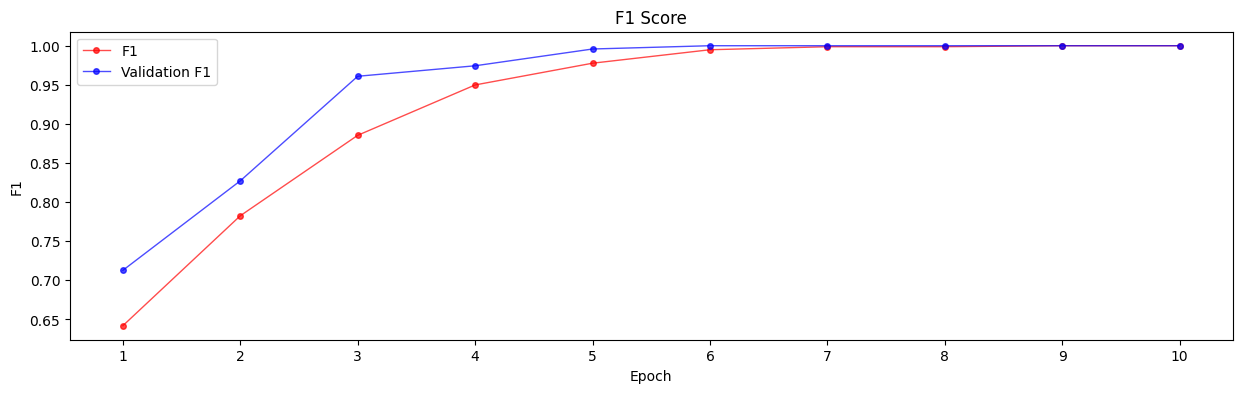

In [ ]:
fig, ax = plt.subplots()

f1 = []
val_f1 = []
for i in range (0,len(hist.history[recall])):
    f1.append(2 * (hist.history[recall][i] * hist.history[precision][i]) /
              (hist.history[recall][i] + hist.history[precision][i]))
    val_f1.append(2 * (hist.history[val_recall][i] * hist.history[val_precision][i]) /
              (hist.history[val_recall][i] + hist.history[val_precision][i]))
plt.rcParams['figure.figsize'] = (14,4)

plt.title('F1 Score')
ax.plot(x_values,f1, 'r',marker='o', linewidth=1,alpha=0.7,label = 'F1',markersize=4)
ax.plot(x_values,val_f1, 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation F1',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.legend()
plt.xticks(x_values)
x = x_values
y = f1
z = f1
val_z = val_f1
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('F1 = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. F1 = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1
plt.show()

In [ ]:
test_acc = model.evaluate(X_test, Y_test)
print(f"정답률: {test_acc}, loss: {test_acc[0]}")

2/2 [==============================] - 8s 5s/step - loss: 0.0016 - recall: 1.0000 - precision: 1.0000
정답률: [0.0016108222771435976, 1.0, 1.0], loss: 0.0016108222771435976


In [ ]:
#실제 데이터에 대한 성능 확인

import os
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np

audio_name = os.path.join('Snoring_final/ex_data.mp3')

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a MP3/WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
wav = load_mp3_16k_mono(audio_name)
len(wav)

415358

In [ ]:
avg_power_of_signal = sum(wav**2)/len(wav)

In [ ]:
SNR_dB = 3.5

SNR_linear = 10 ** SNR_dB / 10
avg_power_of_noise = avg_power_of_signal / SNR_linear
noise = np.random.normal(0, avg_power_of_noise ** 0.5, wav.shape)
wav = (wav + noise ) * 32768.0
print(wav)

tf.Tensor(
[  3.40254    -3.4953477  -1.372069  ...  -3.27816    -1.2500442
 -20.211315 ], shape=(415358,), dtype=float32)


In [ ]:
min_wav = (min(wav))
min_wav

<tf.Tensor: shape=(), dtype=float32, numpy=-5495.059>

In [ ]:
if len(wav) > 16000:
    sequence_stride = 16000
else:
    sequence_stride = 16000-1

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=sequence_stride, batch_size=1)

samples, index = audio_slices.as_numpy_iterator().next()

print(len(audio_slices))

25


In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([16000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=sequence_stride, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

print(audio_slices)

<BatchDataset element_spec=TensorSpec(shape=(None, None, 257, 1), dtype=tf.float32, name=None)>


In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

print(yhat)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]


In [ ]:
from itertools import groupby

yhat1 = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat1).numpy()

print(calls)

4


In [ ]:
yhat_new = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat_new).numpy()

print(calls)

4


<ipython-input-42-f589eb274129>:25: MatplotlibDeprecationWarning: The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='red', alpha=0.2)
<ipython-input-42-f589eb274129>:21: MatplotlibDeprecationWarning: The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='green', alpha=0.2)


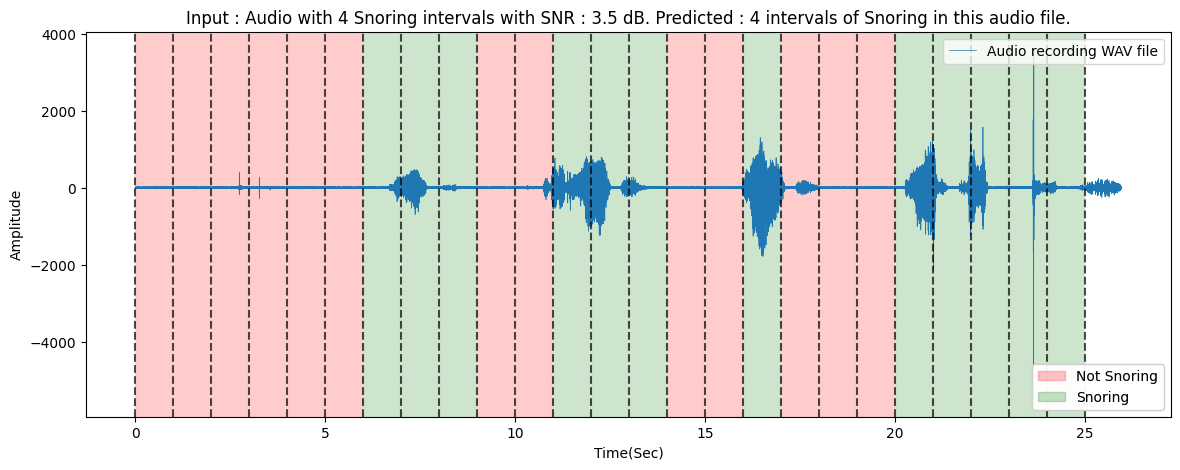

In [ ]:
import numpy as np
import matplotlib.collections as collections
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (14,5)

x = np.linspace(0, len(wav)/16000, len(wav))
ax.plot(x,wav,linewidth=0.5)
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude')

for i in range(len(yhat)+1):
    x=i
    ax.axvline(x, color='black', linestyle='--',alpha=0.7)
    if i != len (yhat):
        yrange = (4*min_wav, -6*min_wav)
        xrange1 = [(i, 1)]
        color='red'
        if yhat[i]==1:
            c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='green', alpha=0.2)
            ax.add_collection(c)

        else:
            c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='red', alpha=0.2)
            ax.add_collection(c)

red_patch = mpatches.Patch(color='red', label='Not Snoring', alpha=0.2)
green_patch = mpatches.Patch(color='green', label='Snoring', alpha=0.2)

leg1 = ax.legend(labels=['Audio recording WAV file'], loc= 1)

leg2 = ax.legend(handles=[red_patch,green_patch], loc =4)
ax.add_artist(leg1)
ax.add_artist(leg2)
plt.title(f'Input : Audio with {calls} Snoring intervals with SNR : {SNR_dB} dB. Predicted : {calls} intervals of Snoring in this audio file.')
plt.show()

In [ ]:
ipd.Audio('Snoring_final/ex_data.mp3')